In [41]:
from herbie import Herbie

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from paint.standard2 import cm_tmp, cm_wind, cm_wave_height
from toolbox import EasyMap, pc

In [42]:
H = Herbie("2023-10-12", model="ecmwf", product="oper", fxx=18)

✅ Found ┊ model=ecmwf ┊ product=oper ┊ 2023-Oct-12 00:00 UTC F18 ┊ GRIB2 @ azure ┊ IDX @ azure


In [33]:
H = Herbie("2023-10-12 12", model="ecmwf", product="oper", fxx=18)
H.grib

✅ Found ┊ model=ecmwf ┊ product=oper ┊ 2023-Oct-12 12:00 UTC F18 ┊ GRIB2 @ azure ┊ IDX @ azure


'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20231012/12z/0p4-beta/oper/20231012120000-18h-oper-fc.grib2'

In [34]:
H = Herbie("2023-10-12", model="ecmwf", product="oper", fxx=18, priority="azure")

✅ Found ┊ model=ecmwf ┊ product=oper ┊ 2023-Oct-12 00:00 UTC F18 ┊ GRIB2 @ azure ┊ IDX @ azure


In [35]:
H.xarray(":2t:")

<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2023-10-12
    step                 timedelta64[ns] 18:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2023-10-12T18:00:00
Data variables:
    t2m                  (latitude, longitude) float32 256.9 256.9 ... 226.6
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 oper
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/michael/data/ecmwf/20231012/subset_92893dc...
    searchString:            :2t:

In [36]:
H = Herbie("2022-10-12", model="ecmwf", product="oper", fxx=18)

✅ Found ┊ model=ecmwf ┊ product=oper ┊ 2022-Oct-12 00:00 UTC F18 ┊ GRIB2 @ azure ┊ IDX @ azure


In [37]:
# Show the searchString_help
print(H.searchString_help)


Use regular expression to search for lines in the index file.
Here are some examples you can use for the ecCodes-style `searchString`

Look at the ECMWF GRIB Parameter Database
https://apps.ecmwf.int/codes/grib/param-db

======================== ==============================================
searchString (oper/enso) Messages that will be downloaded
======================== ==============================================
":2t:"                   2-m temperature
":10u:"                  10-m u wind vector
":10v:"                  10-m v wind vector
":10(u|v):               **10m u and 10m v wind**
":d:"                    Divergence (all levels)
":gh:"                   geopotential height (all levels)
":gh:500"                geopotential height only at 500 hPa
":st:"                   soil temperature
":tp:"                   total precipitation
":msl:"                  mean sea level pressure
":q:"                    Specific Humidity
":r:"                    relative humidity
":ro:" 

In [38]:
# Pay attention to the "search_this" column
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
0,1,0,609046,0-609046,2022-10-12,2022-10-12 18:00:00,0 days 18:00:00,skt,NaN,sfc,NaN,g,0001,od,fc,oper,:skt:sfc:g:0001:od:fc:oper
1,2,609046,1218092,609046-1218092,2022-10-12,2022-10-12 18:00:00,0 days 18:00:00,st,NaN,sfc,NaN,g,0001,od,fc,oper,:st:sfc:g:0001:od:fc:oper
2,3,1218092,1624188,1218092-1624188,2022-10-12,2022-10-12 18:00:00,0 days 18:00:00,r,300,pl,NaN,g,0001,od,fc,oper,:r:300:pl:g:0001:od:fc:oper
3,4,1624188,2233234,1624188-2233234,2022-10-12,2022-10-12 18:00:00,0 days 18:00:00,gh,300,pl,NaN,g,0001,od,fc,oper,:gh:300:pl:g:0001:od:fc:oper
4,5,2233234,2842280,2233234-2842280,2022-10-12,2022-10-12 18:00:00,0 days 18:00:00,gh,925,pl,NaN,g,0001,od,fc,oper,:gh:925:pl:g:0001:od:fc:oper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,48114266,48926262,48114266-48926262,2022-10-12,2022-10-12 18:00:00,0 days 18:00:00,d,250,pl,NaN,g,0001,od,fc,oper,:d:250:pl:g:0001:od:fc:oper
78,79,48926262,49738258,48926262-49738258,2022-10-12,2022-10-12 18:00:00,0 days 18:00:00,vo,250,pl,NaN,g,0001,od,fc,oper,:vo:250:pl:g:0001:od:fc:oper
79,80,49738258,50347328,49738258-50347328,2022-10-12,2022-10-12 18:00:00,0 days 18:00:00,ro,NaN,sfc,NaN,g,0001,od,fc,oper,:ro:sfc:g:0001:od:fc:oper
80,81,50347328,51159324,50347328-51159324,2022-10-12,2022-10-12 18:00:00,0 days 18:00:00,d,50,pl,NaN,g,0001,od,fc,oper,:d:50:pl:g:0001:od:fc:oper


In [39]:
ds = H.xarray(":r:")
ds

<xarray.Dataset>
Dimensions:              (isobaricInhPa: 9, latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2022-10-12
    step                 timedelta64[ns] 18:00:00
  * isobaricInhPa        (isobaricInhPa) float64 1e+03 925.0 ... 200.0 50.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2022-10-12T18:00:00
Data variables:
    r                    (isobaricInhPa, latitude, longitude) float32 101.2 ....
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 oper
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/michael/data/ecmwf/20221012/subset_cc89589...
    searchString:            :r:

AttributeError: 'list' object has no attribute 'herbie'

In [17]:
H = Herbie("2023-10-12", model="ecmwf", product="oper")

# Get u and v wind component
ds = H.xarray(":10(u|v):")

# Compute the wind speed
ds["spd"] = np.sqrt(ds["u10"] ** 2 + ds["v10"] ** 2)

# without too much thought, just quickly copy attributes
ds["spd"].attrs = ds["u10"].attrs.copy()
ds["spd"].attrs["standard_name"] = "wind_speed"
ds["spd"].attrs["long_name"] = "10 m wind speed"
ds["spd"].attrs["GRIB_name"] = "10 m Wind Speed"

ds

✅ Found ┊ model=ecmwf ┊ product=oper ┊ 2023-Oct-12 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure


/opt/mamba/envs/herbie/lib/python3.11/site-packages/herbie/core.py:797: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2023-10-12
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 10.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2023-10-12
Data variables:
    u10                  (latitude, longitude) float32 5.765 5.765 ... -4.672
    v10                  (latitude, longitude) float32 3.426 3.426 ... 1.754
    gribfile_projection  object None
    spd                  (latitude, longitude) float32 6.706 6.706 ... 4.991
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 oper
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/michael/data/ecmwf/20231012/subset_92ef52c...
    searchString:            :10(u|v):

Text(1.0, 1.0, '10 m Wind Speed')

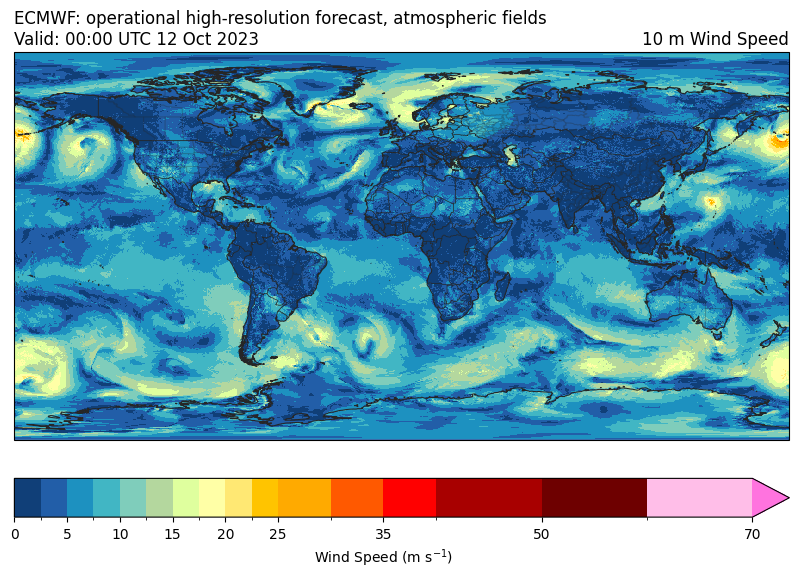

In [18]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.spd, transform=pc, **cm_wind().cmap_kwargs
)
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, **cm_wind().cbar_kwargs)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.spd.GRIB_name, loc="right")



In [19]:
ds = H.xarray(":(q|gh):500")
ds

/opt/mamba/envs/herbie/lib/python3.11/site-packages/herbie/core.py:797: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 2023-10-12
    step                 timedelta64[ns] 00:00:00
    isobaricInhPa        float64 500.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2023-10-12
Data variables:
    q                    (latitude, longitude) float32 0.0002175 ... 0.0001641
    gh                   (latitude, longitude) float32 5.281e+03 ... 4.885e+03
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 oper
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/michael/data/ecmwf/20231012/subset_92ef594...
    searchString:            :(q|gh):500

Text(1.0, 1.0, '500.0 hPa\nSpecific humidity/Geopotential height')

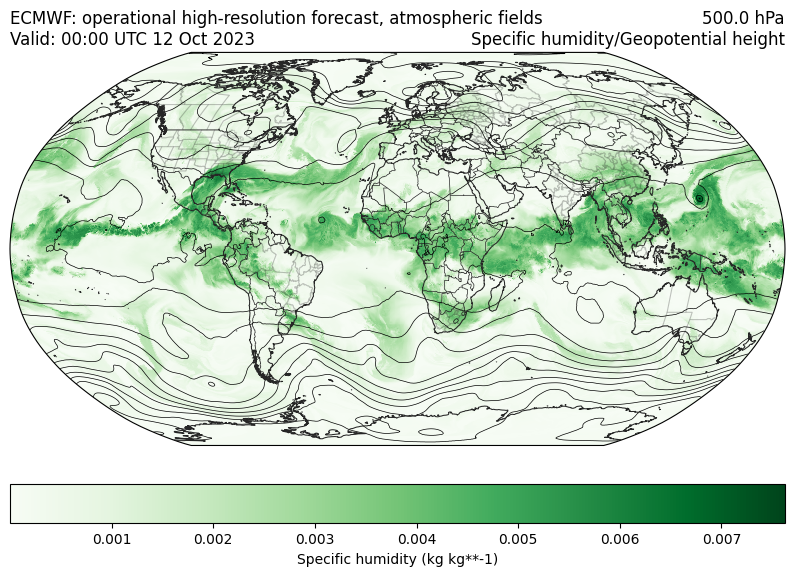

In [20]:
ax = EasyMap("50m", crs=ccrs.Robinson(), figsize=[10, 10]).STATES().BORDERS().ax

# Color shade by specific humidity
p = ax.pcolormesh(ds.longitude, ds.latitude, ds.q, transform=pc, cmap="Greens")

plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    label=f"{ds.q.GRIB_name} ({ds.q.units})",
)

# Contours for geopotential height
ax.contour(
    ds.longitude,
    ds.latitude,
    ds.gh,
    transform=pc,
    colors="k",
    linewidths=0.5,
    levels=range(0, 10_000, 60 * 2),
)


ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(
    f"{ds.isobaricInhPa.item()} {ds.isobaricInhPa.units}\n{ds.q.GRIB_name}/{ds.gh.GRIB_name}",
    loc="right",
)


In [22]:
H = Herbie("2023-10-12 00:00", model="ecmwf", product="enfo")
ds = H.xarray(":2t:")
ds

✅ Found ┊ model=ecmwf ┊ product=enfo ┊ 2023-Oct-12 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure
Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.


[<xarray.Dataset>
 Dimensions:              (number: 50, latitude: 451, longitude: 900)
 Coordinates:
   * number               (number) int64 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
     time                 datetime64[ns] 2023-10-12
     step                 timedelta64[ns] 00:00:00
     heightAboveGround    float64 2.0
   * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
   * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
     valid_time           datetime64[ns] 2023-10-12
 Data variables:
     t2m                  (number, latitude, longitude) float32 258.0 ... 228.4
     gribfile_projection  object None
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             ecmf
     GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             European Centre for Medium-Range Weather Forecasts
     model:        

In [23]:
# Dataset with all 50 members
ds[0]

<xarray.Dataset>
Dimensions:              (number: 50, latitude: 451, longitude: 900)
Coordinates:
  * number               (number) int64 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
    time                 datetime64[ns] 2023-10-12
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2023-10-12
Data variables:
    t2m                  (number, latitude, longitude) float32 258.0 ... 228.4
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 enfo
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/michael/data/ecmwf/20231012/subset_92ef663...
    searchString:            :2t:

In [24]:
# This Dataset is of the mean of all the members, right?
ds[1]

<xarray.Dataset>
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    number               int64 0
    time                 datetime64[ns] 2023-10-12
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2023-10-12
Data variables:
    t2m                  (latitude, longitude) float32 257.8 257.8 ... 228.6
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ecmwf
    product:                 enfo
    description:             ECMWF open data
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/michael/data/ecmwf/20231012/subset_92ef663...
    searchString:            :2t:

In [25]:
H.idx

'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20231012/00z/0p4-beta/enfo/20231012000000-0h-enfo-ef.index'

In [40]:
H = Herbie("2023-10-12 00:00", model="ecmwf", product="enfo")
ds = H.xarray(":r:")
print(ds[0])


✅ Found ┊ model=ecmwf ┊ product=enfo ┊ 2023-Oct-12 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure
Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.
<xarray.Dataset>
Dimensions:              (number: 50, isobaricInhPa: 9, latitude: 451,
                          longitude: 900)
Coordinates:
  * number               (number) int64 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
    time                 datetime64[ns] 2023-10-12
    step                 timedelta64[ns] 00:00:00
  * isobaricInhPa        (isobaricInhPa) float64 1e+03 925.0 ... 200.0 50.0
  * latitude             (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude            (longitude) float64 -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 2023-10-12
Data variables:
    r                    (number, isobaricInhPa, latitude, longitude) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:         

In [27]:
ax = (
    EasyMap("50m", crs=ds.herbie.crs, figsize=8, linewidth=1, dark=True)
    .BORDERS()
    .STATES(alpha=0.5)
    .ax
)

# Draw Relative Humidity
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.r, transform=pc, cmap="BrBG", vmin=0, vmax=100
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    label="Relative Humidity (%)",
)

# Draw Geopential Height Contours
ax.contour(
    ds.longitude,
    ds.latitude,
    ds.gh,
    colors="k",
    transform=pc,
    levels=range(0, 6000, 40),
)

ax.set_title(
    f"500 hPa RH and Geopotential height\nValid {ds.valid_time.dt.strftime('%Y-%m-%d %H:%M').item()} UTC",
    loc="center",
    fontsize=10,
)
ax.set_title(f"{ds.model.upper()}", loc="left")



AttributeError: 'list' object has no attribute 'herbie'